## Machine Learning: Brazil houses to rent

In [4]:
library(ggplot2)
library(dplyr)

df <-  read.csv('E:\\Datasets\\houses_to_rent.csv')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### EDA

In [8]:
print(summary(df))
print(str(df))

       X             city             area             rooms       
 Min.   :   0   Min.   :0.0000   Min.   :   10.0   Min.   : 1.000  
 1st Qu.:1520   1st Qu.:1.0000   1st Qu.:   58.0   1st Qu.: 2.000  
 Median :3040   Median :1.0000   Median :  100.0   Median : 3.000  
 Mean   :3040   Mean   :0.8633   Mean   :  151.1   Mean   : 2.493  
 3rd Qu.:4559   3rd Qu.:1.0000   3rd Qu.:  200.0   3rd Qu.: 3.000  
 Max.   :6079   Max.   :1.0000   Max.   :24606.0   Max.   :10.000  
                                                                   
    bathroom      parking.spaces       floor            animal    
 Min.   : 1.000   Min.   : 0.000   -      :1555   acept    :4666  
 1st Qu.: 1.000   1st Qu.: 1.000   1      : 573   not acept:1414  
 Median : 2.000   Median : 1.000   3      : 401                   
 Mean   : 2.342   Mean   : 1.756   2      : 379                   
 3rd Qu.: 3.000   3rd Qu.: 2.000   4      : 319                   
 Max.   :10.000   Max.   :12.000   5      : 314       

In [11]:
print(nrow(df))
print(ncol(df))
head(df)

[1] 6080
[1] 14


X,city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


### Data Wrangling

In [12]:
#Drop 'X' column
df$X <- NULL

#changing factor type

df$floor<- as.numeric(df$floor)

#Replace all '-' value with NA

df[df == '-'] <- NA

In [13]:
#Fixing numeric column:removing 'R$' and transform to numeric

for (i in 9:13){
  df[, i] <- substr(df[, i], 3, 7)
  df[, i] <- gsub(",","",df[, i])
  df[, i] <- as.numeric(df[, i])
}
head(df)

Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"Warning message in eval(expr, envir, enclos):
"NAs introducidos por coerción"

city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total
1,240,3,3,4,1,acept,furnished,0,8000,1000,121,9121
0,64,2,1,1,3,acept,not furnished,540,820,122,11,1493
1,443,5,5,4,24,acept,furnished,4172,7000,1417,89,1268
1,73,2,2,1,5,acept,not furnished,700,1250,150,16,2116
1,19,1,1,0,1,not acept,not furnished,0,1200,41,16,1257
1,13,1,1,0,13,acept,not furnished,0,2200,42,28,2270


In [ ]:
#### Missings/NA

[1] TRUE


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


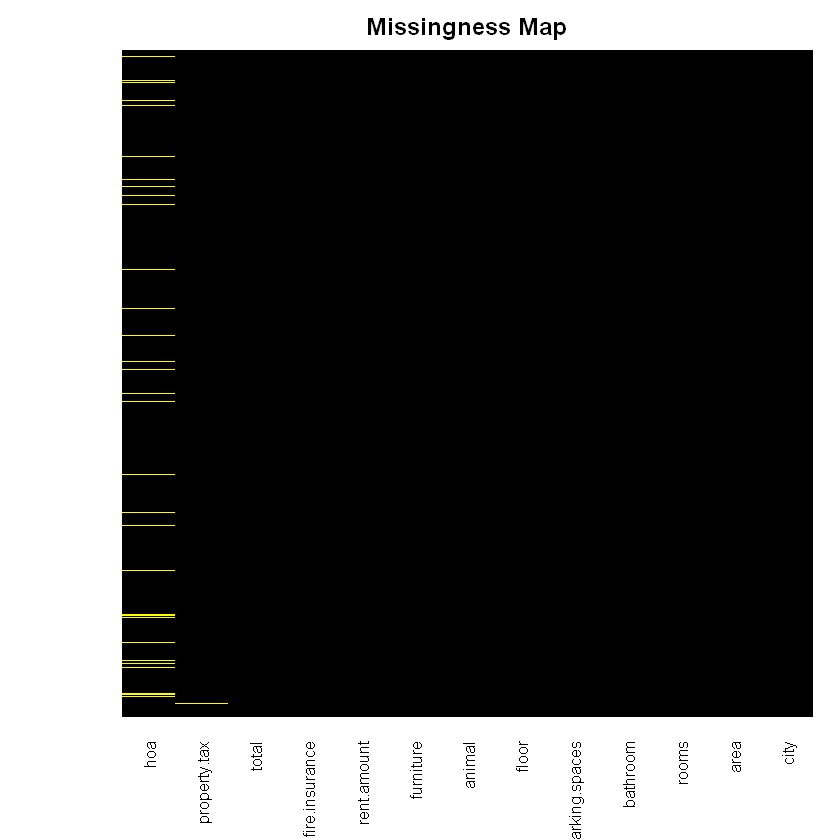

In [15]:
print(any(is.na(df)))

#Missings plot
library(Amelia)
missmap(df, y.at=c(1),y.labels=c(''),col=c("yellow", "black"), legend=FALSE)

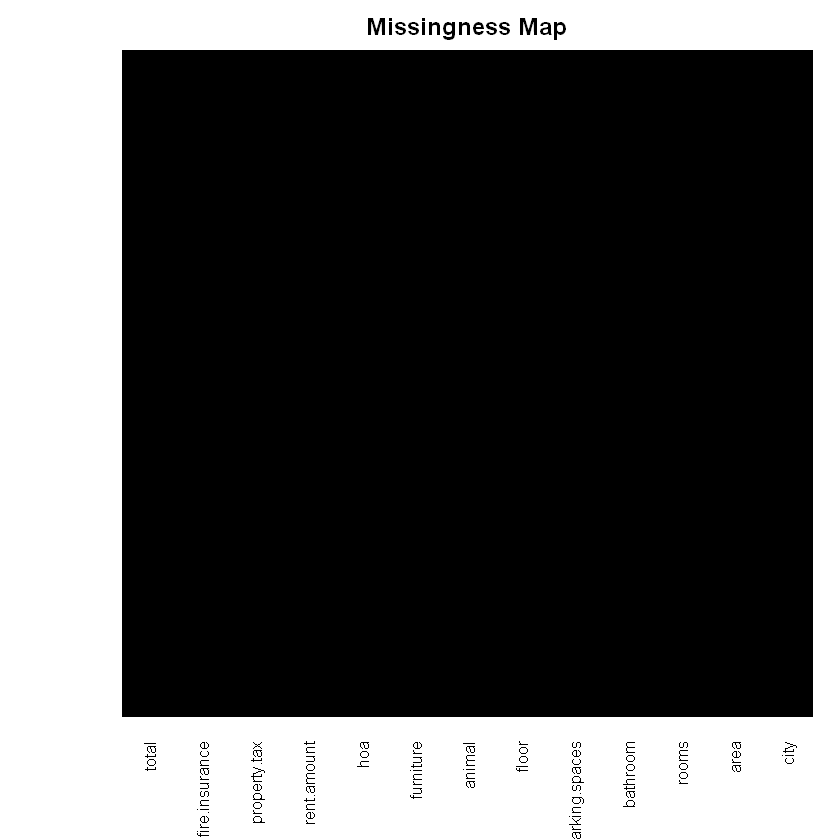

In [16]:
#removing NA
df  <- na.omit(df)
#or with: df <- df[complete.cases(df), ]
missmap(df, y.at=c(1),y.labels=c(''),col=c("yellow", "black"), legend=FALSE)

### Visualization

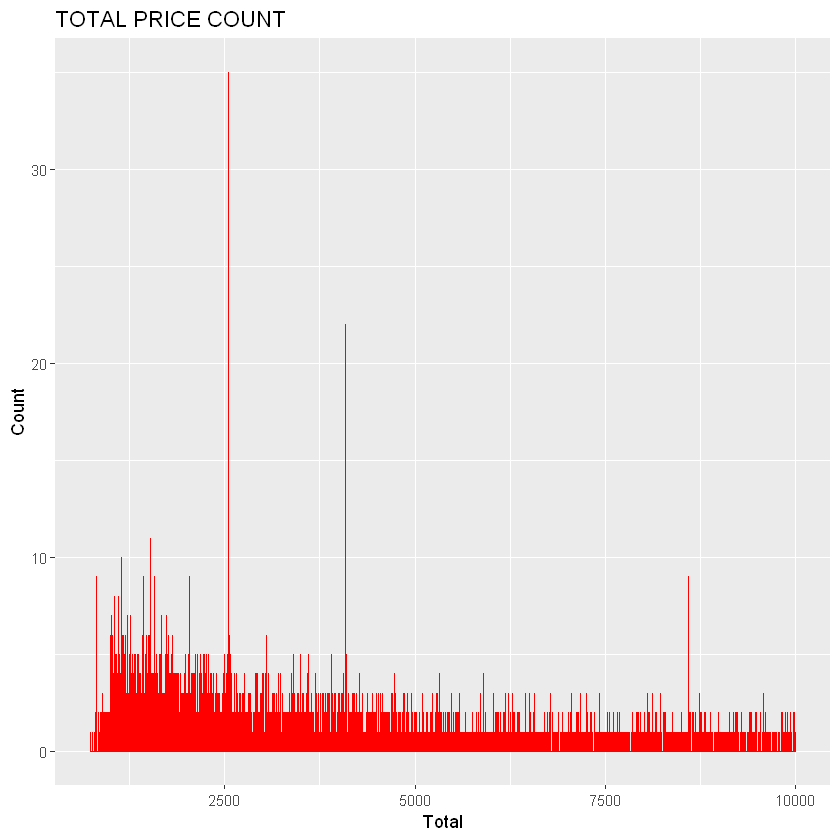

In [18]:
library(ggplot2)

#Histogram - Count plot
pl <- ggplot(df, aes(x=total))
pl2 <-  pl + geom_histogram(binwidth = 0.1, color ='red', fill = 'pink', alpha= 0.4)
pl3 <-  pl2 + xlab('Total') + ylab('Count') 
print(pl3 + ggtitle('TOTAL PRICE COUNT'))

Warning message:
"position_stack requires non-overlapping x intervals"

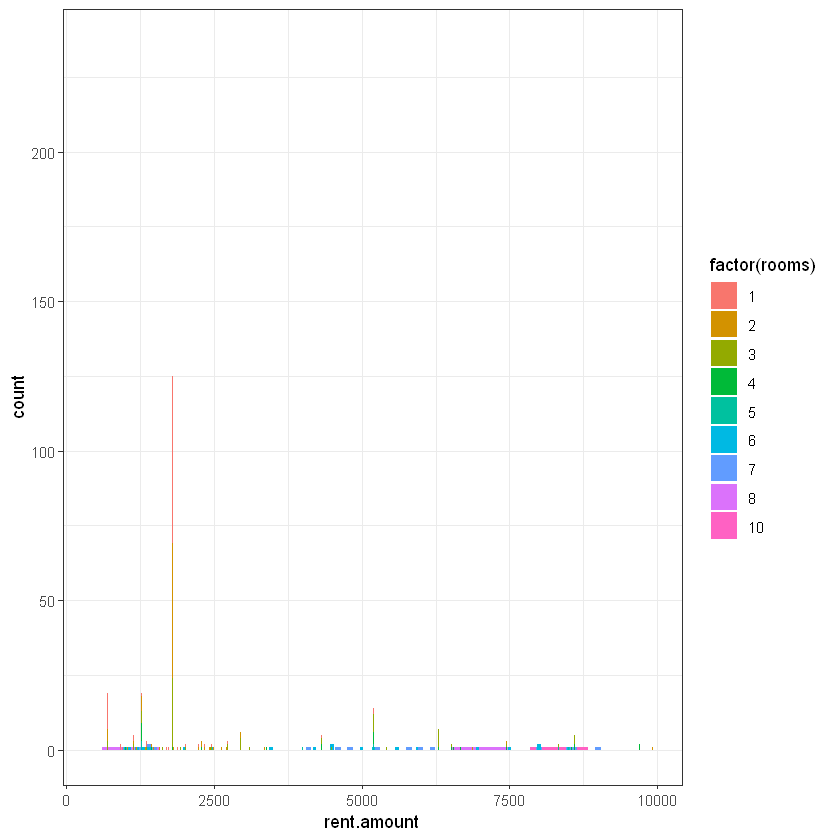

In [20]:
# rent.amount according to number of rooms
pl <- ggplot(data=df, aes(x=rent.amount)) 
pl + geom_bar(aes(fill=factor(rooms)))+ theme_bw()

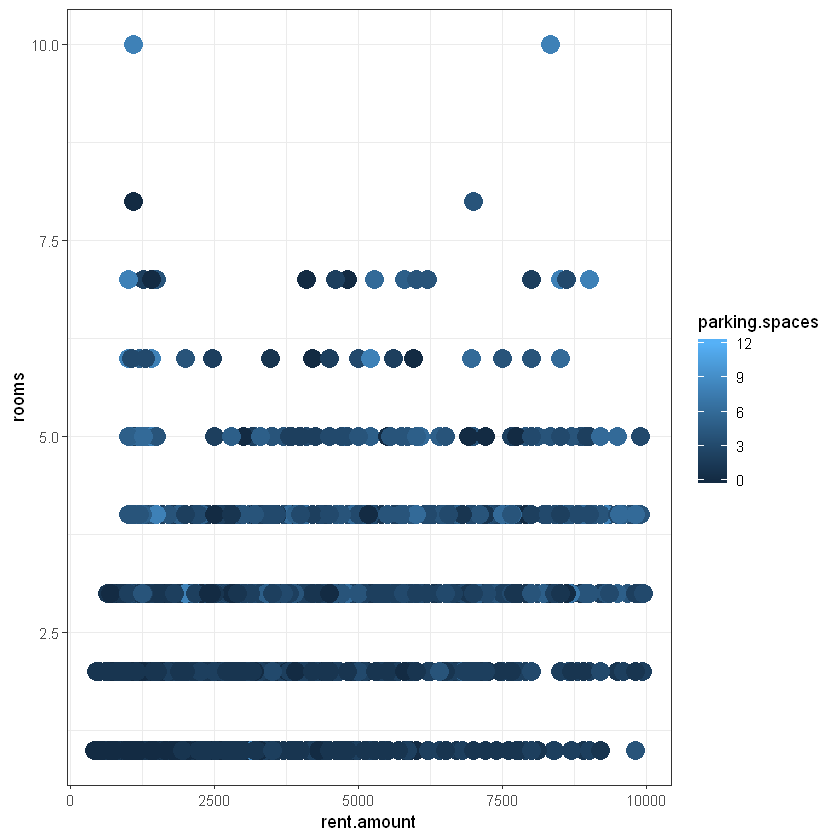

In [21]:
pl <- ggplot(df, aes(x=rent.amount, y=rooms))
pl2 <- pl + geom_point(size=5, aes(color=parking.spaces))
print(pl2  + theme_bw())


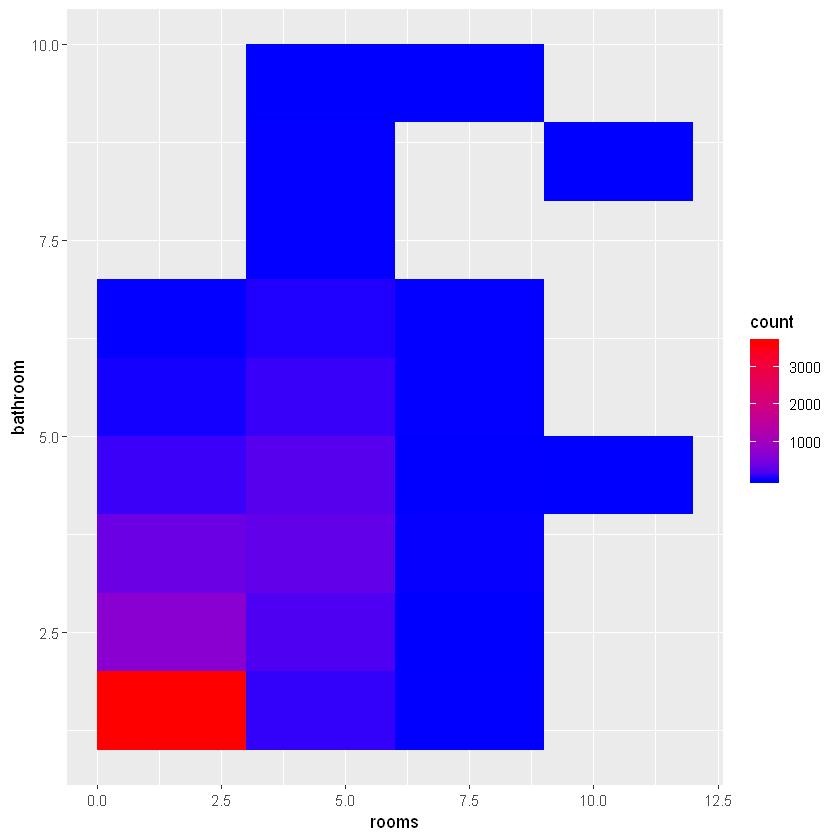

In [22]:
#number of rooms vs number of bathrooms
pl <- ggplot(df,aes(x=rooms,y=bathroom))
print(pl + geom_bin2d(binwidth=c(3,1)) + scale_fill_gradient(high = 'red', low = 'blue'))


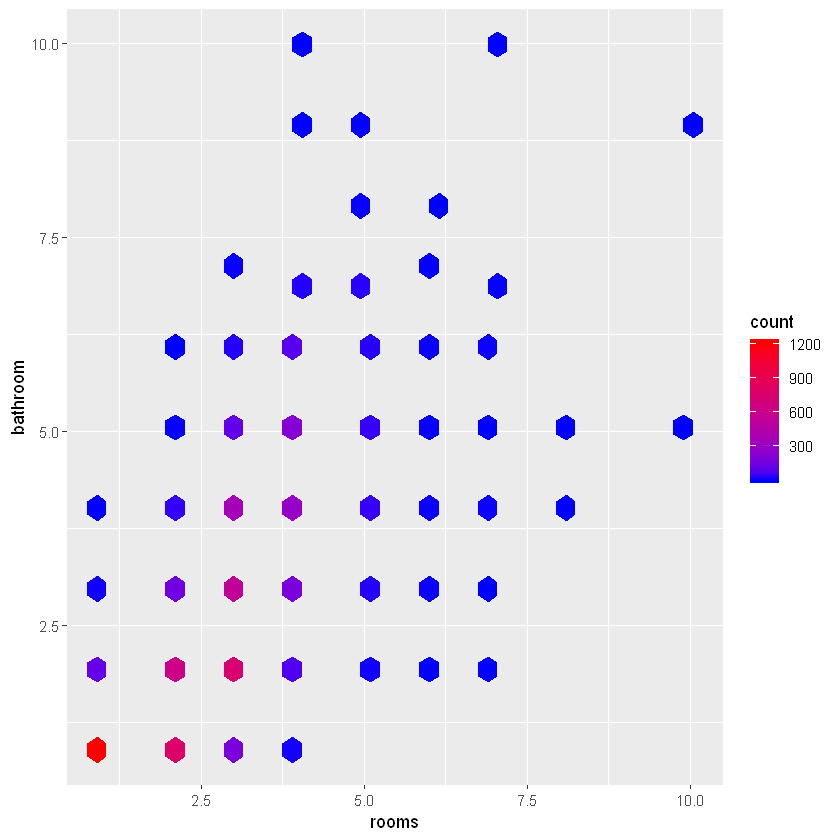

In [26]:
library(hexbin)
pl + geom_hex()+ scale_fill_gradient(high = 'red', low = 'blue')

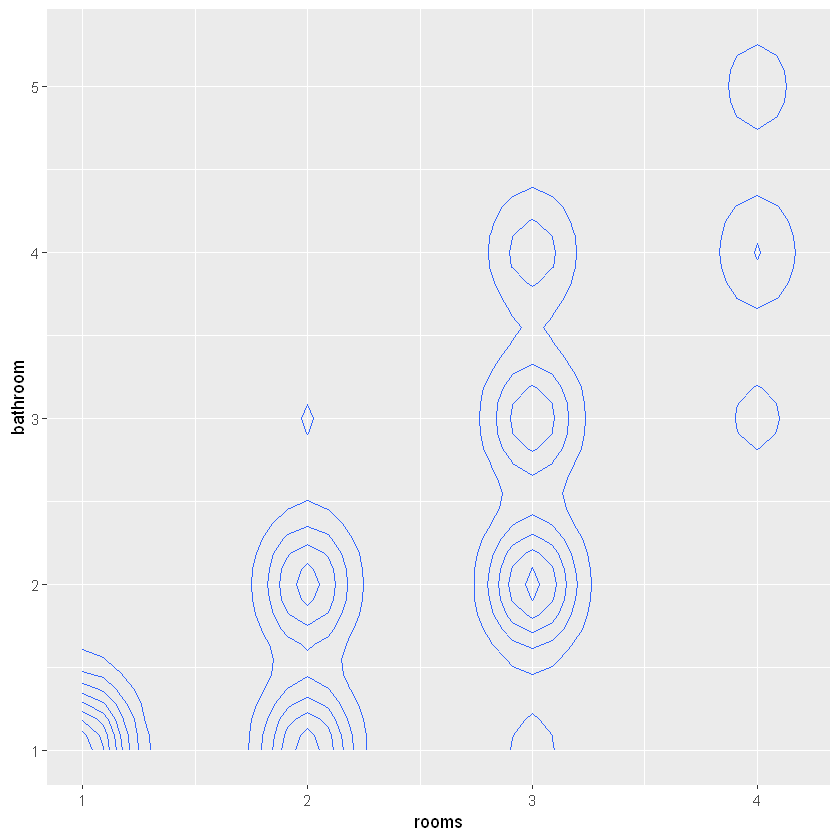

In [28]:
pl + geom_density2d() + scale_fill_gradient(high = 'red', low = 'blue')

### Machine Learning

#### Data prep

In [29]:
#Binning classification feature: total price
df_ml <-df
bins <- cut(df_ml$total,breaks=4)
table(bins)
df_ml$total_bins <- cut(df_ml$total,breaks=4, labels = c(0,1,2,3))
as.data.frame(table(df_ml$total_bins))

bins
     (727,3.05e+03] (3.05e+03,5.37e+03] (5.37e+03,7.68e+03]    (7.68e+03,1e+04] 
               3085                1516                 706                 545 

Var1,Freq
0,3085
1,1516
2,706
3,545


In [30]:
#droping unneccesary columns

df_ml$total <- NULL

#### Correlation Matrix

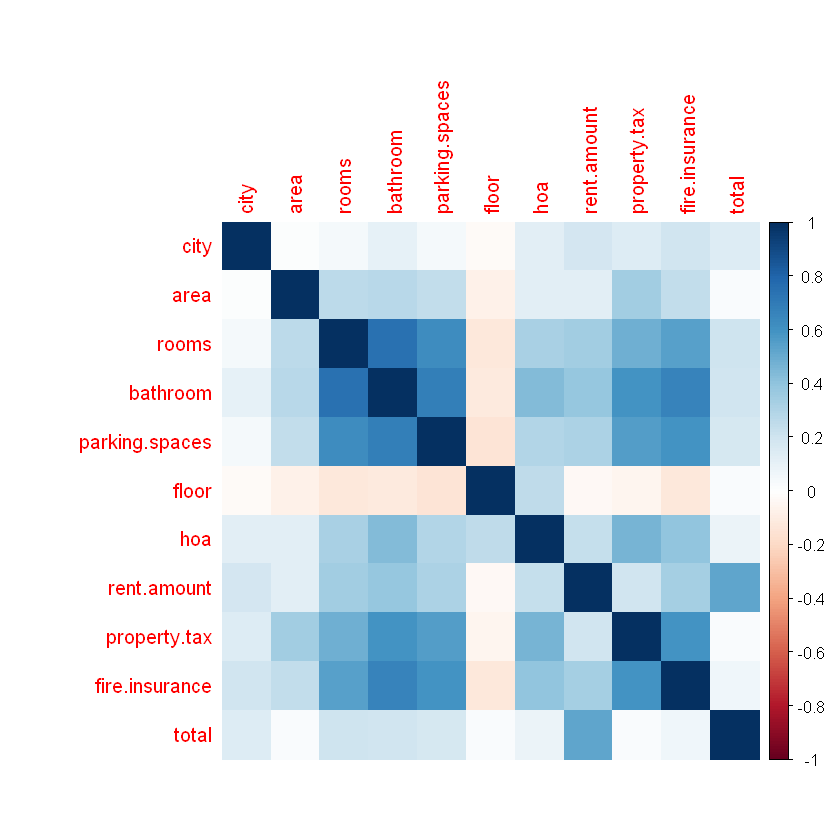

In [32]:
library(corrplot)
#Numeric columns
num.cols <- sapply(df,is.numeric)
#filter
cor.data <- cor(df[,num.cols])
corrplot(cor.data, method='color')

#### Sampling: equal random data rows according to classification labeled column

In [33]:
as.data.frame(table(df_ml$total_bins))
library(dplyr)
df_ml <- df_ml %>% group_by(total_bins) %>% sample_n(407)
table(df_ml$total_bins)
head(df_ml)

Var1,Freq
0,3085
1,1516
2,706
3,545



  0   1   2   3 
407 407 407 407 

city,area,rooms,bathroom,parking.spaces,floor,animal,furniture,hoa,rent.amount,property.tax,fire.insurance,total_bins
1,500,4,6,3,1,acept,not furnished,6466,7300,2536,110,0
1,470,4,5,4,1,acept,furnished,0,1020,2375,154,0
1,250,4,6,4,5,not acept,not furnished,3000,1450,875,184,0
1,120,3,1,0,1,acept,not furnished,0,2200,0,34,0
1,230,3,4,3,33,not acept,not furnished,3200,8000,1167,102,0
1,277,3,3,0,4,acept,not furnished,2332,8500,550,108,0


#### Model

In [34]:
#Train and test split
library(caTools)
set.seed(101)
split <- sample.split(df_ml$total_bins, SplitRatio = 0.7)
train <- subset(df_ml, split == TRUE)
test <-subset(df_ml, split == FALSE)

##### Algorithms

#### Logistic Regression

In [50]:
#log.model <- glm(label ~., family=binomial(link='logit'), data = )
log.model <- glm(total_bins ~., family=binomial(link='logit'), data = train)
summary(log.model)


Call:
glm(formula = total_bins ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1743   0.0835   0.4201   0.6392   5.6845  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.726e+00  3.698e-01  -4.668 3.05e-06 ***
city                    1.009e+00  2.435e-01   4.142 3.44e-05 ***
area                   -2.012e-03  1.456e-03  -1.382  0.16707    
rooms                   4.007e-01  1.262e-01   3.176  0.00150 ** 
bathroom                1.690e-01  1.178e-01   1.434  0.15148    
parking.spaces          2.545e-01  8.347e-02   3.049  0.00230 ** 
floor                   1.579e-02  6.987e-03   2.259  0.02387 *  
animalnot acept        -1.142e-01  1.987e-01  -0.575  0.56530    
furniturenot furnished -6.821e-01  2.080e-01  -3.280  0.00104 ** 
hoa                    -2.382e-04  9.592e-05  -2.483  0.01303 *  
rent.amount             6.661e-04  5.946e-05  11.204  

In [51]:
##Predictions
fitted.probabilities <-  predict(log.model, newdata = test, type = 'response')
fitted.results  <- ifelse(fitted.probabilities>0.5,1,0)
fitted.results

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   1   1   0   0   1   0   1   1   0   1   1   1   0   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   0   1   0   0   0   1   0   1   1   0   0   1   1   1   0   0   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   1   0   1   1   1   0   0   1   0   1   0   0   1   1   0   1   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   0   0   1   0   1   0   0   0   1   1   1   0   0   0   1   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   1   1   0   0   0   1   0   0   0   0   1   1   0   0   0   0   1   0   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   0   1   0   1   0   0   1   1   1   1   1   0   0   0   0   1   1   0   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1 
221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
  1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1   1   1   1   1 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 
  1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   1 
421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 
  1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
481 482 483 484 485 486 487 488 
  1   1   1   1   1   1   1   1

In [52]:
##Evaluation
misClassError <- mean(fitted.results != test$total_bins)
print(paste('Accuracy',1-misClassError))


[1] "Accuracy 0.362704918032787"


In [57]:
#Confusion matrix
table(test$total_bins, fitted.results>0.5)

   
    FALSE TRUE
  0    58   64
  1     3  119
  2     0  122
  3     2  120

#### Decision Tree

In [62]:
library(rpart)
tree<- rpart(total_bins ~.,method = 'class',data=train)
summary(tree)

Call:
rpart(formula = total_bins ~ ., data = train, method = "class")
  n= 1140 

          CP nsplit rel error    xerror       xstd
1 0.26023392      0 1.0000000 1.0432749 0.01629257
2 0.10175439      2 0.4795322 0.5064327 0.01916616
3 0.04736842      3 0.3777778 0.3976608 0.01806616
4 0.02105263      5 0.2830409 0.3192982 0.01685281
5 0.01929825      6 0.2619883 0.3005848 0.01650169
6 0.01403509      8 0.2233918 0.2654971 0.01576993
7 0.01169591      9 0.2093567 0.2432749 0.01525180
8 0.01052632     11 0.1859649 0.2385965 0.01513681
9 0.01000000     15 0.1438596 0.2233918 0.01474794

Variable importance
   rent.amount fire.insurance            hoa           area   property.tax 
            28             22             16             10              9 
      bathroom parking.spaces          floor          rooms 
             7              4              2              2 

Node number 1: 1140 observations,    complexity param=0.2602339
  predicted class=0  expected loss=0.75  P(node)

ERROR: Error in `$<-.data.frame`(`*tmp*`, total_bins, value = list()): replacement has 0 rows, data has 488


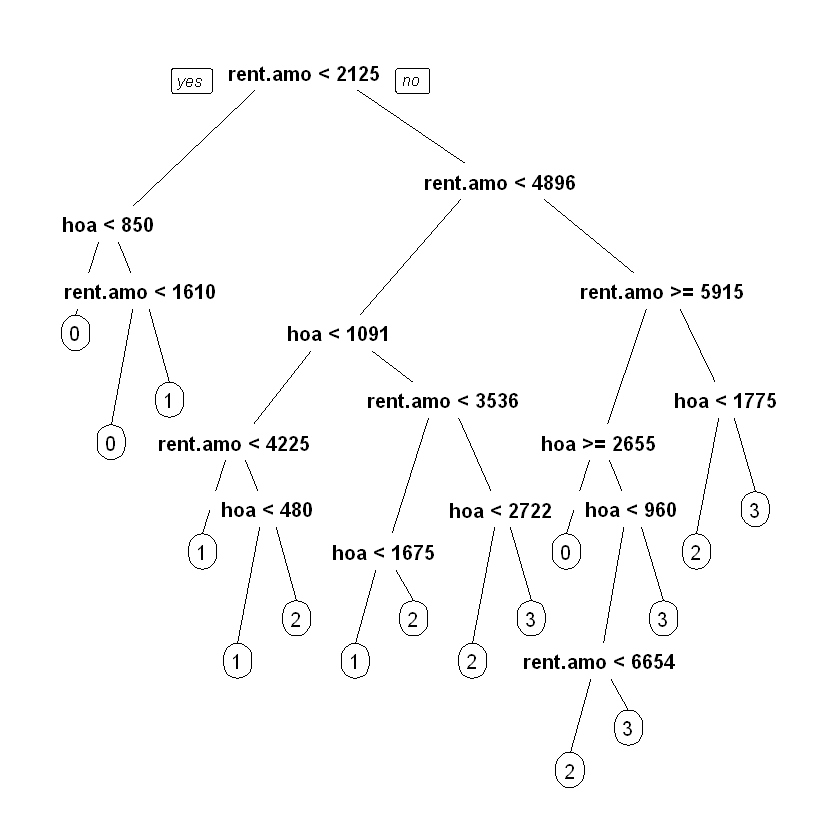

In [63]:
library(rpart.plot)
prp(tree)
#predictions
tree.preds <- predict(tree,test)
tree.preds <- as.data.frame(tree.preds)
joiner <- function(x){
  if (x >= 0.5){
    return('Yes')
  }else{
    return('No')
  }
}
tree.preds$total_bins <-sapply(tree.preds$Yes,joiner)
print(head(tree.preds))

#### Random Forest

In [40]:
library(randomForest)
rf.model<- randomForest(total_bins ~.,data=train, importante=TRUE)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [41]:
#Evaluation
rf.model$confusion
rf.model$confusion[, 'class.error']
rf.model$importance

,0,1,2,3,class.error
0,249,17,0,19,0.12631579
1,3,266,16,0,0.06666667
2,1,12,256,16,0.10175439
3,1,0,16,268,0.05964912


0          1          2          3 
0.12631579 0.06666667 0.10175439 0.05964912

,MeanDecreaseGini
city,4.050706
area,61.028242
rooms,15.810405
bathroom,24.346073
parking.spaces,19.249661
floor,37.152362
animal,4.065969
furniture,6.673147
hoa,127.624974
rent.amount,271.417276


In [42]:
#Predictions
rf.preds <-predict(rf.model,test)
table(rf.preds,test$total_bins)

        
rf.preds   0   1   2   3
       0 105   1   0   0
       1  11 118   4   0
       2   0   3 113   8
       3   6   0   5 114

#### SVM

In [59]:
library(e1071)
model <- svm(total_bins ~., data = train)
summary(model)


Call:
svm(formula = total_bins ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.07692308 

Number of Support Vectors:  738

 ( 155 199 202 182 )


Number of Classes:  4 

Levels: 
 0 1 2 3




In [60]:
#predictions
pred.values <- predict(model, test[1:13])
table(pred.values,test$total_bins)

           
pred.values   0   1   2   3
          0  94   0   0   2
          1  17 119   7   0
          2   0   3 106   4
          3  11   0   9 116

In [61]:
#tuned results
tuned.results <-tune(svm,train.x = total_bins ~., data = train,kernel ='radial',gamma=c(0.1))
summary(tuned.results)


Error estimation of 'svm' using 10-fold cross validation: 0.1166667


#### KNN

In [47]:
library(class)
set.seed(101)
predicted <- knn(train[1:4],test[1:4],train$total_bins, k=4)
misclass.error <- mean(test$total_bins != predicted)

print(misclass.error)
predicted<-NULL
error.rate<-NULL

[1] 0.647541


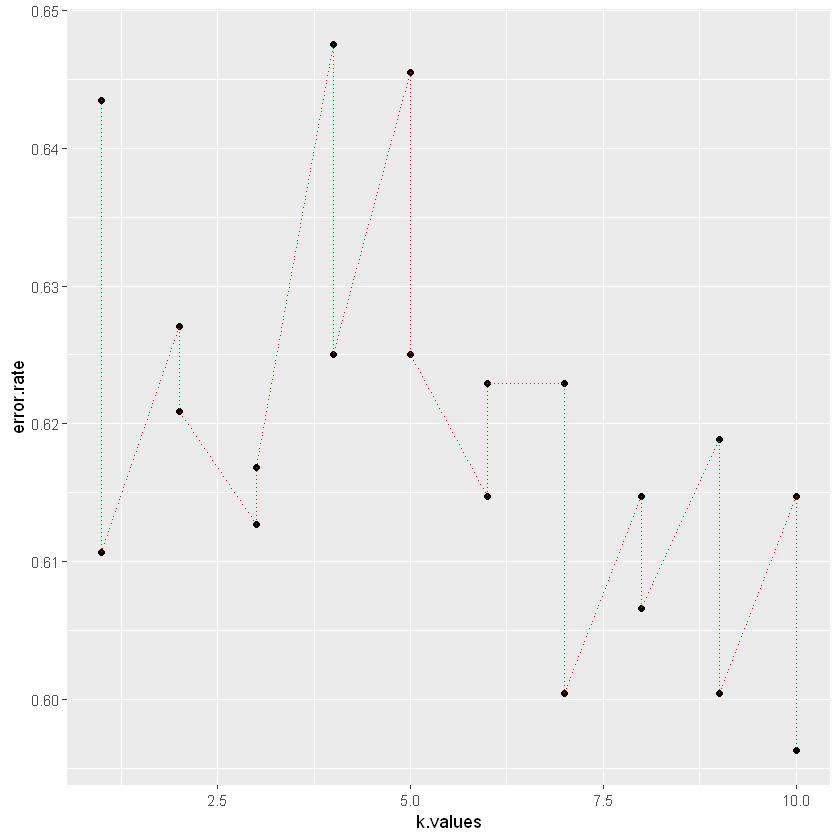

In [48]:
#determine best k value
for (i in 1:20){
  set.seed(101)
  predicted<- knn(train[1:4],test[1:4],train$total_bins, k=i)
  error.rate[i] <- mean(test$total_bins != predicted)
}

library(ggplot2)
k.values <- 1:10
error.df <- data.frame(error.rate,k.values)

ggplot(error.df, aes(k.values,error.rate)) + geom_point() + geom_line(lty= 'dotted', color='red')

In [49]:
#using new k value

predicted <- knn(train[1:4],test[1:4],train$total_bins, k=5)
misclass.error <- mean(test$total_bins != predicted)
print(misclass.error)

[1] 0.6516393
